In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.cloud import bigquery

# setup credentials
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = (
    os.path.abspath("../credentials/github-bigquery.json"))

In [2]:
%load_ext google.cloud.bigquery

In [29]:
%%bigquery head

SELECT 
    *
FROM
    `githubarchive.year.2019`
LIMIT 1000

In [4]:
head

,type,public,payload,repo,actor,org,created_at,id,other
0,ForkEvent,True,"{""forkee"":{""id"":220469948,""node_id"":""MDEwOlJlc...","{'id': 207227255, 'name': 'nazoking/scim2-filt...","{'id': 17908063, 'login': 'thomaspoignant', 'g...","{'id': None, 'login': None, 'gravatar_id': Non...",2019-11-08 13:13:44+00:00,10818894537,"{""actor"":{""display_login"":""thomaspoignant""}}"
1,ForkEvent,True,"{""forkee"":{""id"":222792688,""node_id"":""MDEwOlJlc...","{'id': 222792187, 'name': 'demobox/parent-repo...","{'id': 54992675, 'login': 'appdevtester', 'gra...","{'id': None, 'login': None, 'gravatar_id': Non...",2019-11-19 21:25:42+00:00,10900935831,"{""actor"":{""display_login"":""appdevtester""}}"
2,ForkEvent,True,"{""forkee"":{""id"":187697227,""node_id"":""MDEwOlJlc...","{'id': 48352776, 'name': 'zitsen/unqlite.rs', ...","{'id': 1129192, 'login': 'waylon531', 'gravata...","{'id': None, 'login': None, 'gravatar_id': Non...",2019-05-20 18:57:54+00:00,9661775449,"{""actor"":{""display_login"":""waylon531""}}"
3,ForkEvent,True,"{""forkee"":{""id"":182773531,""node_id"":""MDEwOlJlc...","{'id': 182770728, 'name': 'longmore/bilibili_b...","{'id': 9898606, 'login': '512workshop', 'grava...","{'id': None, 'login': None, 'gravatar_id': Non...",2019-04-22 11:48:43+00:00,9485816279,"{""actor"":{""display_login"":""512workshop""}}"
4,ForkEvent,True,"{""forkee"":{""id"":206478895,""node_id"":""MDEwOlJlc...","{'id': 137655069, 'name': 'terrylinooo/mynote'...","{'id': 2175963, 'login': 'xtex404', 'gravatar_...","{'id': None, 'login': None, 'gravatar_id': Non...",2019-09-05 05:07:09+00:00,10350948482,"{""actor"":{""display_login"":""xtex404""}}"
5,ForkEvent,True,"{""forkee"":{""id"":202567669,""node_id"":""MDEwOlJlc...","{'id': 202553959, 'name': 'vikassnwl/demopygit...","{'id': 54147791, 'login': 'subhashsnwl', 'grav...","{'id': None, 'login': None, 'gravatar_id': Non...",2019-08-15 15:38:09+00:00,10218311137,"{""actor"":{""display_login"":""subhashsnwl""}}"
6,ForkEvent,True,"{""forkee"":{""id"":206490606,""node_id"":""MDEwOlJlc...","{'id': 8954525, 'name': 'mewebstudio/Purifier'...","{'id': 37169906, 'login': 'MoeCasts', 'gravata...","{'id': None, 'login': None, 'gravatar_id': Non...",2019-09-05 06:27:04+00:00,10351293448,"{""actor"":{""display_login"":""MoeCasts""}}"
7,ForkEvent,True,"{""forkee"":{""id"":217427836,""node_id"":""MDEwOlJlc...","{'id': 169208857, 'name': 'WangXuan95/USTC-RVS...","{'id': 24309054, 'login': 'rhinno', 'gravatar_...","{'id': None, 'login': None, 'gravatar_id': Non...",2019-10-25 01:42:23+00:00,10710315817,"{""actor"":{""display_login"":""rhinno""}}"
8,ForkEvent,True,"{""forkee"":{""id"":206657554,""node_id"":""MDEwOlJlc...","{'id': 33263118, 'name': 'gorhill/uBlock', 'ur...","{'id': 34787245, 'login': 'jordan-bonecutter',...","{'id': None, 'login': None, 'gravatar_id': Non...",2019-09-05 21:07:26+00:00,10357779021,"{""actor"":{""display_login"":""jordan-bonecutter""}}"
9,ForkEvent,True,"{""forkee"":{""id"":186761436,""node_id"":""MDEwOlJlc...","{'id': 162990268, 'name': 'cxplan/CXTouch', 'u...","{'id': 49048582, 'login': 'aijialefu', 'gravat...","{'id': None, 'login': None, 'gravatar_id': Non...",2019-05-15 06:18:25+00:00,9628161490,"{""actor"":{""display_login"":""aijialefu""}}"


In [5]:
def ecdf_graph_generator(df):
    df = df.sort_values('event_count').reset_index(drop=True)
    df['ratio'] = df['count'] / df['count'].sum()
    df['cum_ratio'] = df.ratio.cumsum()

    plt.figure(figsize=(10,6))
    df.head(50).cum_ratio.plot()
    plt.xticks(range(0,51,5))
    plt.grid()
    plt.show()

### Fork

In [6]:
%%bigquery fork
SELECT 
    event_count,
    count(*) as count
FROM (
    SELECT 
        repo.id,
        COUNT(*) as event_count 
    FROM
        `githubarchive.year.2019`
    WHERE
        type = 'ForkEvent'
    group by 1
    )
group by 1

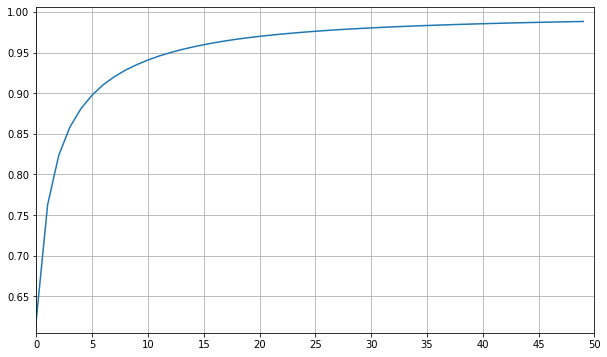

In [7]:
ecdf_graph_generator(fork)

### Watch

In [44]:
%%bigquery watch
SELECT 
    event_count,
    count(*) as count
FROM (
    SELECT 
        repo.id,
        COUNT(distinct actor.id) as event_count 
    FROM
        `githubarchive.year.*`
    WHERE
        type = 'WatchEvent'
    group by 1
    )
group by 1

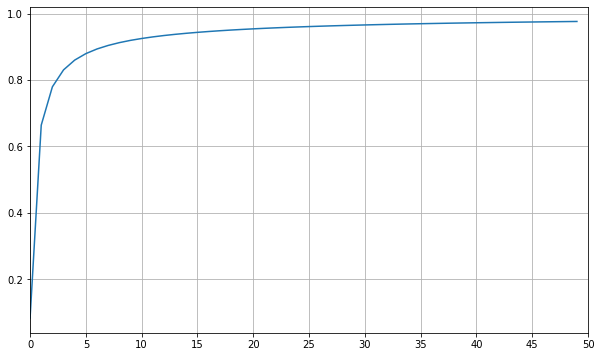

In [45]:
ecdf_graph_generator(watch)

In [73]:
watch['event_count_log'] = (watch.event_count+1).apply(np.log)

In [79]:
watch['event_count_log2'] = (watch.event_count_log+1).apply(np.log)

In [75]:
import matplotlib.pyplot as plt

In [47]:
watch.nsmallest(5, 'event_count')

,event_count,count
4924,0,982087
1210,1,6924332
6106,2,1375837
2434,3,608094
1209,4,351281


In [52]:
watch = watch.sort_values('event_count')
(watch['count']/watch['count'].sum()).head()

4924    0.082447
1210    0.581305
6106    0.115503
2434    0.051050
1209    0.029490
Name: count, dtype: float64

- 대부분 자기꺼는 찍고 시작하는듯 ㅋㅋ (ex. craftsangjae)
- 스타 없는 건 8%, 1개 있는 게 약 60%

- https://github.com/garrettw/Phue의 경우
- https://github.com/sqmk/Phue를 포크해온 것!
- 포크한 거는 원본만 가져가야할 것 같은데 ?
- 포크를 다시 포크하기도 하네 ㅎㄷ

### 왜 star를 찍었는데 사라졌을까 트래킹해보자

In [ ]:
%%bigquery temp
SELECT 
    *
FROM
    `githubarchive.year.*`
WHERE
    repo.id=58633942


- undo가 아직 지원되지 않는다 ... (상재님 피드백)

### no fork many star

In [13]:
%%bigquery no_fork_yes_star_count
SELECT 
    star_count event_count,
    count(*) as count

FROM (
    SELECT
        star.repo_id,
        star.star_count,
        coalesce(fork.fork_count, 0) as fork_count    
    FROM (
        SELECT
            repo.id as repo_id,
            COUNT(distinct actor.id) as star_count
        FROM 
            `githubarchive.year.*`
        WHERE
            type = 'WatchEvent'
        GROUP BY 1
        ) star

    LEFT JOIN (
        SELECT 
            repo.id as repo_id,
            COUNT(distinct actor.id) as fork_count 
        FROM
            `githubarchive.year.*`
        WHERE
            type = 'ForkEvent'
        GROUP BY 1
        ) fork
    ON star.repo_id = fork.repo_id
    ) star_fork

WHERE fork_count = 0

GROUP BY 1

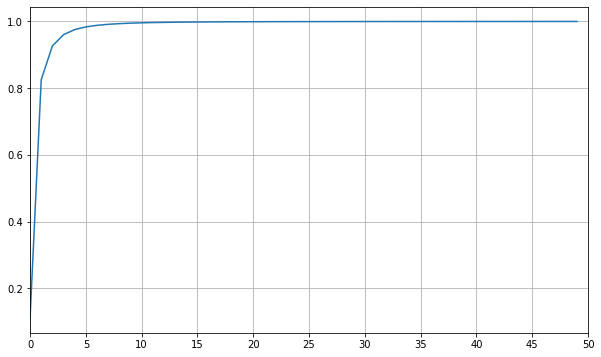

In [14]:
# 포크 없는 레포의 스타 분포
ecdf_graph_generator(no_fork_yes_star_count)

In [21]:
%%bigquery no_fork_many_star_example
SELECT 
    star_fork.repo_id,
    repo_name.repo_name,
    star_fork.star_count,
    star_fork.fork_count

FROM (
    SELECT
        star.repo_id,
        star.star_count,
        coalesce(fork.fork_count, 0) as fork_count    
    FROM (
        SELECT
            repo.id as repo_id,
            COUNT(distinct actor.id) as star_count
        FROM 
            `githubarchive.year.*`
        WHERE
            type = 'WatchEvent'
        GROUP BY 1
        HAVING star_count > 10
        ) star

    LEFT JOIN (
        SELECT 
            repo.id as repo_id,
            COUNT(distinct actor.id) as fork_count 
        FROM
            `githubarchive.year.*`
        WHERE
            type = 'ForkEvent'
        GROUP BY 1
        ) fork
    ON star.repo_id = fork.repo_id
    ) star_fork

LEFT JOIN (
    SELECT
        distinct 
        repo.id as repo_id,
        repo.name as repo_name
    FROM 
        `githubarchive.year.*`
    ) repo_name
ON star_fork.repo_id = repo_name.repo_id

WHERE fork_count = 0

limit 100

In [22]:
no_fork_many_star_example.nlargest(20, 'star_count')

,repo_id,repo_name,star_count,fork_count
19,55533404,stonewell/pymterm,97,0
90,120401684,kmaehashi/chainer-colab,36,0
7,191023655,LtHummus/AuthThingie,35,0
0,107179048,peterschussheim/prop-styles,32,0
55,128551504,techcentaur/Krivine-Machine,29,0
56,128551504,techcentaur/Abstract-Machines,29,0
45,85290477,fvgs/commandir,27,0
95,71346832,metarhia/impress-example,24,0
96,71346832,metarhia/ImpressExample,24,0
11,3028557,vim-nodejs-errorformat,23,0


- MichalPaszkiewicz/3d-game	의 경우 star가 229개 찍혔다고 하는데, 실제 들어가보면 5개밖에 없다 ... 뭘까 ....?
    - 저게 다 undo일 것 같진 않은데 ;;
    - 한 놈이 반복해서 한 거였다 ...

In [25]:
%%bigquery no_star_many_fork_example
SELECT 
    star_fork.repo_id,
    repo_name.repo_name,
    star_fork.star_count,
    star_fork.fork_count

FROM (
    SELECT
        fork.repo_id,
        fork.fork_count,
        coalesce(star.star_count, 0) as star_count    
    FROM (
        SELECT
            repo.id as repo_id,
            COUNT(distinct actor.id) as fork_count
        FROM 
            `githubarchive.year.2019`
        WHERE
            type = 'ForkEvent'
        GROUP BY 1
        HAVING fork_count > 10
        ) fork

    LEFT JOIN (
        SELECT 
            repo.id as repo_id,
            COUNT(distinct actor.id) as star_count 
        FROM
            `githubarchive.year.*`
        WHERE
            type = 'WatchEvent'
        GROUP BY 1
        ) star
    ON star.repo_id = fork.repo_id
    ) star_fork

LEFT JOIN (
    SELECT
        distinct 
        repo.id as repo_id,
        repo.name as repo_name
    FROM 
        `githubarchive.year.*`
    ) repo_name
ON star_fork.repo_id = repo_name.repo_id

WHERE star_count = 0

limit 100

In [26]:
no_star_many_fork_example.nlargest(5, 'fork_count')

,repo_id,repo_name,star_count,fork_count
90,196292268,LambdaSchool/github-usercard,0,1323
8,150116082,learn-co-students/parrot-ruby-online-web-sp-000,0,182
88,150116136,learn-co-students/countdown-to-midnight-online...,0,177
97,138048593,AllStarCodeOrg/responsiveDesignExample,0,138
99,214206186,learn-co-students/debugging-practice-fix-our-b...,0,61


- learn-co-students/oo-my-pets-online-web-ft-110419의 경우는 교육용이라서 포크를 많이 뜬 것 같다
- 교육용이 많다

In [38]:
%%bigquery fork_temp

SELECT 
    actor.id,
    actor.login

FROM
    `githubarchive.year.2019`
    
WHERE 
    repo.id = 169813973
    AND type = 'ForkEvent'
LIMIT 100

In [39]:
fork_temp.login.value_counts()

camilasrody    84
Name: login, dtype: int64

- 한 놈이 반복적으로 포크할 수 있다

### Push를 조금 까보자

In [32]:
%%bigquery push

SELECT 
    *
FROM
    `githubarchive.year.2019`
WHERE
    type = 'PushEvent'
LIMIT 20

In [37]:
push.org.values[0]

{'id': None,
 'login': None,
 'gravatar_id': None,
 'avatar_url': None,
 'url': None}

In [35]:
push.repo.values[0]

{'id': 229692166,
 'name': 'vasantbala/moviegenie',
 'url': 'https://api.github.com/repos/vasantbala/moviegenie'}

In [33]:
push.payload.values[0]

'{"push_id":4429889758,"size":1,"distinct_size":1,"ref":"refs/heads/master","head":"9aa6059502c0ca7e10a8c9e661efe201d97dfcf4","before":"0ecc21e222018717a01480c51384138e13ebe127","commits":[{"sha":"9aa6059502c0ca7e10a8c9e661efe201d97dfcf4","author":{"name":"vasantbala","email":"3cd0513b34a1c22b7521b6e4124f84e0e9a51a06@users.noreply.github.com"},"message":"deleted all projects","distinct":true,"url":"https://api.github.com/repos/vasantbala/moviegenie/commits/9aa6059502c0ca7e10a8c9e661efe201d97dfcf4"}]}'

In [ ]:
for i in push.iloc[0]:print(i, '\n')

- README를 이 테이블에서 확인하기는 어려울 거 같다

### 혼자서 개쩌는 레포 만든 케이스가 있을까

In [42]:
%%bigquery single_popular_rep
SELECT
    actor_count.repo_id,
    actor_count.repo_name,
    actor_count.actor_count,
    
    star_fork.star_count,
    star_fork.fork_count

FROM (
    
    SELECT 
        repo.id as repo_id,
        repo.name as repo_name,
        count(distinct actor.id) as actor_count
    FROM
        `githubarchive.year.2019`
    WHERE
        type = 'PushEvent'
    GROUP BY 1, 2
    HAVING actor_count = 1
) actor_count

JOIN (
    SELECT
        fork.repo_id,
        fork.fork_count,
        star.star_count
    FROM (
        SELECT
            repo.id as repo_id,
            COUNT(*) as fork_count
        FROM 
            `githubarchive.year.*`
        WHERE
            type = 'ForkEvent'
        GROUP BY 1
        HAVING fork_count > 10
        ) fork

    JOIN (
        SELECT 
            repo.id as repo_id,
            COUNT(*) as star_count 
        FROM
            `githubarchive.year.*`
        WHERE
            type = 'WatchEvent'
        GROUP BY 1
        HAVING star_count > 100
        ) star
    ON star.repo_id = fork.repo_id
    ) star_fork

ON actor_count.repo_id = star_fork.repo_id

limit 500

In [43]:
single_popular_rep

,repo_id,repo_name,actor_count,star_count,fork_count
0,113989456,eleurent/phd-bibliography,1,253,73
1,102782389,CommerceQL/commerceql,1,207,24
2,6157458,pf4j/pf4j,1,1058,371
3,143670435,xmge/gonote,1,1794,404
4,1031705,sionescu/iolib,1,124,46
...,...,...,...,...,...
495,10855300,alexfernandez/loadtest,1,1686,195
496,207088755,iUIShop/LibUIDK,1,151,68
497,92603478,ubports/ubuntu-touch,1,541,59
498,11868555,shannonmoeller/reset-css,1,215,123


### 커밋

In [56]:
%%bigquery push_count
SELECT
    event_count, 
    count(*) as count
FROM (
    SELECT 
        repo.id,
        count(*) as event_count

    FROM
        `githubarchive.year.*`
    WHERE
        type = 'PushEvent'

    GROUP BY 1
)
GROUP BY 1

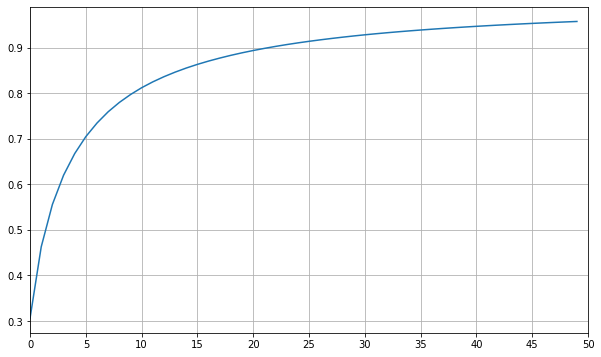

In [57]:
ecdf_graph_generator(push_count)

In [59]:
push_count = push_count.sort_values('event_count')
push_count['ratio'] = push_count['count'] / push_count['count'].sum()
push_count['cum_ratio'] = push_count['ratio'].cumsum()

In [61]:
push_count.ratio = round(push_count.ratio, 4)

In [63]:
push_count.head(20)

,event_count,count,ratio,cum_ratio
3284,1,23889686,0.3066,0.306602
5642,2,12174669,0.1563,0.462853
7749,3,7237257,0.0929,0.555736
6219,4,5000826,0.0642,0.619917
1467,5,3710115,0.0476,0.667533
6998,6,2906389,0.0373,0.704834
577,7,2320274,0.0298,0.734613
9258,8,1922848,0.0247,0.759291
284,9,1594939,0.0205,0.779760
4782,10,1349812,0.0173,0.797084


### 푸시 없이 인기 많은 것

In [ ]:
%%bigquery nopush_popular

SELECT
    push.repo_id,
    push.repo_name,
    push.push_count,
    watch.watch_count,
    fork.fork_count
    
FROM (
    SELECT 
        repo.id as repo_id,
        repo.name as repo_name,
        count(*) as push_count

    FROM
        `githubarchive.year.*`
    WHERE
        type = 'PushEvent'

    GROUP BY 1, 2
) push

LEFT JOIN (
    SELECT
        repo.id as repo_id,
        count(*) as watch_count

    FROM
        `githubarchive.year.*`
    WHERE
        type = 'WatchEvent'

    GROUP BY 1
) watch
ON push.repo_id = watch.repo_id

LEFT JOIN (
    SELECT
        repo.id as repo_id,
        count(*) as fork_count

    FROM
        `githubarchive.year.*`
    WHERE
        type = 'ForkEvent'

    GROUP BY 1
) fork
ON push.repo_id = fork.repo_id

WHERE 
    push.push_count < 5 AND
    watch.watch_count > 100 AND
    fork.fork_count > 100
    
LIMIT 100

In [106]:
nopush_popular.nlargest(10, 'watch_count')

,repo_id,repo_name,push_count,watch_count,fork_count
56,12721303,CEWendel/SWTableViewCell,4,8044,1636
25,27398751,adalovelacecode/Swift,1,5229,1396
20,18487827,source-code-pro,1,4649,169
43,89932094,opendigg/android-ui,1,4151,952
79,37796696,cucumber/cucumber-meta,1,2888,651
75,31160078,dennisweissmann/Device,3,2838,354
16,184604,twitter/twitter4j,1,2480,1351
73,597131,step,1,2031,252
8,99326910,rfyiamcool/-,3,1937,355
63,49858180,fastos/tcpdive,4,1893,261


- repo.id 하나에 repo.name이 2개 붙은 경우가 있다 (ex. 81598961)
  - 이 경우에는 숫자 적은 게 repo의 organization인데, 특정 기간 상에서의 오류인 걸로 보인다
- repo.id 하나에 repo.name이 엄청 많이 붙은 게 있다 .. (ex. 27398751)
  - 아마 아이디를 바꾼 것으로 추측
  - 위의 경우는 미친듯이 아이디 바꿔대다가 탈퇴함;;

- 커밋 적은데 인기 많은 건 데이터 셋이나 참조 자료, 정리본 등이다.  
ex) https://github.com/opendigg/awesome-github-android-ui

In [155]:
%%bigquery noissue_popular

SELECT
    issue.repo_id,
    repo_name.repo_name,
    issue.issue_count,
    watch.watch_count,
    fork.fork_count
    
FROM (
    SELECT 
        repo.id as repo_id,
        count(*) as issue_count

    FROM
        `githubarchive.year.*`
    WHERE
        type = 'IssuesEvent'

    GROUP BY 1
) issue

LEFT JOIN (
    SELECT
        repo.id as repo_id,
        count(*) as watch_count

    FROM
        `githubarchive.year.*`
    WHERE
        type = 'WatchEvent'

    GROUP BY 1
) watch
ON issue.repo_id = watch.repo_id

LEFT JOIN (
    SELECT
        repo.id as repo_id,
        count(*) as fork_count

    FROM
        `githubarchive.year.*`
    WHERE
        type = 'ForkEvent'

    GROUP BY 1
) fork
ON issue.repo_id = fork.repo_id

LEFT JOIN (
    SELECT distinct
        repo.id as repo_id,
        repo.name as repo_name
    FROM
        `githubarchive.year.*`
) repo_name
ON issue.repo_id = repo_name.repo_id

WHERE 
    issue.issue_count < 5 AND
    watch.watch_count > 1000 AND
    fork.fork_count > 100
    
LIMIT 100

In [157]:
noissue_popular.nlargest(15, 'fork_count')

,repo_id,repo_name,issue_count,watch_count,fork_count
91,6155249,tchapi/markdown-cheatsheet,2,1823,3631
92,6155249,markdown-cheatsheet,2,1823,3631
93,24420506,v8/v8,2,14914,3329
94,24420506,v8-git-mirror,2,14914,3329
95,24420506,v8/,2,14914,3329
96,24420506,v8/v8-git-mirror,2,14914,3329
64,6412729,joshnh/Git-Commands,2,2122,1656
65,6412729,Git-Commands,2,2122,1656
67,11676078,learndatascience,2,2487,1429
68,11676078,LearnDataScience,2,2487,1429


- 이슈 없이 인기 많고 활발한 깃은 풀리퀘에 이슈같은 게 쌓여있음 (PullRequestReviewCommentEvent)
- 이슈가 아예 없는 애도 있다

In [160]:
%%bigquery issue_nopopular

SELECT
    issue.repo_id,
    repo_name.repo_name,
    issue.issue_count,
    watch.watch_count,
    fork.fork_count
    
FROM (
    SELECT 
        repo.id as repo_id,
        count(*) as issue_count

    FROM
        `githubarchive.year.*`
    WHERE
        type = 'IssuesEvent'

    GROUP BY 1
) issue

LEFT JOIN (
    SELECT
        repo.id as repo_id,
        count(*) as watch_count

    FROM
        `githubarchive.year.*`
    WHERE
        type = 'WatchEvent'

    GROUP BY 1
) watch
ON issue.repo_id = watch.repo_id

LEFT JOIN (
    SELECT
        repo.id as repo_id,
        count(*) as fork_count

    FROM
        `githubarchive.year.*`
    WHERE
        type = 'ForkEvent'

    GROUP BY 1
) fork
ON issue.repo_id = fork.repo_id

LEFT JOIN (
    SELECT distinct
        repo.id as repo_id,
        repo.name as repo_name
    FROM
        `githubarchive.year.*`
) repo_name
ON issue.repo_id = repo_name.repo_id

WHERE 
    issue.issue_count > 1000 AND
    watch.watch_count < 10
    
LIMIT 100

In [162]:
issue_nopopular.nlargest(10, 'issue_count')

,repo_id,repo_name,issue_count,watch_count,fork_count
76,121026767,ikedaosushi/tech-news,19232,9,3.0
72,87151393,hyb1996-guest/AutoJsIssueReport,19122,5,NaN
19,17839063,miketaylr/nobody-look-at-this,8403,9,4.0
20,17839063,nobody-look-at-this,8403,9,4.0
21,17839063,miketaylr/webcompat-tests,8403,9,4.0
22,17839063,webcompat/webcompat-tests,8403,9,4.0
36,18806115,patrickcapriola,7812,1,NaN
37,18806115,patrickcapriola/patrickcapriola,7812,1,NaN
52,25117222,synergy,6849,1,NaN
62,24917178,patric3_website,4373,5,2.0


## 결론

### 추천 풀 생성 룰 관련
- 포크 떠온 레포는 제거하자 (어케 할 건지는 알아봐야함)
- 스타/포크 수 아다리가 좀 안 맞는다 -> distinct count를 해야 한다
- 풀 형성 관련해서 데이터 날리는 걸로는 어전히 star가 그래도 유의미하지 않을까 (vs 상재: issue!!)

### 기억해둘 정보
- 레포의 60%는 스타 1개, 30%는 커밋 1개
- 포크는 그냥 공유용일 수 있어보인다(교육) -> 신뢰하기 어려움
- 레포 이름은 사용자가 이름 바뀌면 바뀌고, 탈퇴하면 날라가기 때문에 살아있는지 검사에 주의해야 한다 (id는 ㄱㅊ)
  - id로 URL 땡기는 등의 API 가능
  - 죽으면(탈퇴하면) 안나옴
- 커밋 별로 없이 유명한 건 간단하며 유용한 거거나 논문 같은 것들
- 이슈 없이 유명한 건 간단한 거나 교재 같은 것 .. 비슷 ... 아님 풀리퀘 conversation에 나오기도 함

### 기타 아이디어
- 웹 UI에서 add한 건지 아님 push한 건지도 확인되면 유의미한 피쳐일듯
- 봇이 푸시한 것도 변별되는가? -> 아마 유의미한 피쳐
- 활동의 다양성 (type 종류 수)
- 최근 업데이트가 없어도 계속 스타가 찍히는 케이스들도 얼마나 있을까?
  - 책 솔루션??

### 커밋 메시지의 컨벤션
- 오탈자 잡는 커밋이라던가
- 근데 요새는 보통 이슈로 처리함

### 구루 유저

### als로 간단하게 임베딩 뽑아서 클러스터링 해보면?